<center>

## Final Exam 

### Data Mining, Machine Learning and Deep Learning

### [KAN - CDSCO1004U]
<center>

    Importing Modules

In [1]:
# Importing modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC

### Exploratory Data Analysis 
    Initial Overview

In [2]:
# Loading the data 
df = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_2/ML/Project/heloc_dataset_v1.csv") # Change path if needed
pd.set_option('display.max_columns', None) # To show all columns 
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


In [3]:
# Getting information on each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

There are only integers, and there are no missing values in the dataset

In [4]:
# Getting basic statistical details
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,5.510183,20.856965,1.253083,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,3.971182,14.580905,3.068684,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,5.000000,12.000000,0.000000,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,6.000000,20.000000,1.000000,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,8.000000,29.000000,3.000000,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,8.000000,104.000000,19.000000,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Three 'describing' values: 
- `-9` No Bureau Record or No Investigation 
- `-8` No Usable/Valid Trades or Inquires 
- `-7` Condition not Met
We can see that -9 is the lowest number of every column.

There are potential outliers, since max value often exceds the 75 percentlie

    Graphical Exploration

In [5]:
# Function for bar plots 
def BarPlot(column):
    """
    Plots the value counts for a column in a Pandas DataFrame.

    Parameters:
        column (Pandas Series): The column to plot.

    Returns:
        fig (Matplotlib Figure): The figure containing the bar plot.
    """
    # get value counts for column
    value_counts = column.value_counts()

    # specify Tableau colors for bars
    colors = ['#0072B2', '#FDBF6F', '#009E73']

    # create bar chart using Matplotlib with specified colors
    plt.bar(value_counts.index, value_counts.values, color=colors)

    # set title and axis labels
    plt.title(f'Value Counts for {column.name}')
    plt.xlabel(f'{column.name} Values')
    plt.ylabel('Frequency')

    # create legend outside of chart
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    labels = value_counts.index
    plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1))

    # display chart
    plt.show()

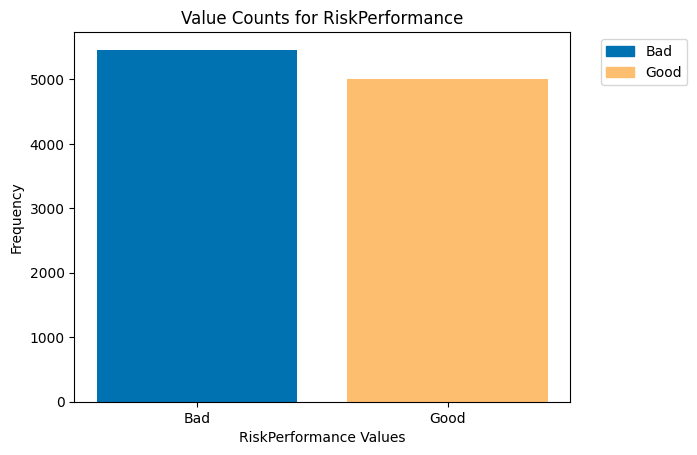

In [6]:
# Value Counts for RiskPerformance
BarPlot(df['RiskPerformance'])

We can see that there is a good balance between Good and Bad, with 47.% Good and 52.2% Bad. 

In [7]:
# Function for Correlogram

def plot_correlogram(df):
    """
    Plots a correlogram (pairwise correlation matrix) for a Pandas DataFrame.

    Parameters:
        data (Pandas DataFrame): The DataFrame to plot.

    Returns:
        fig (Matplotlib Figure): The figure containing the correlogram.
     """
    # calculate correlation matrix
    corr_matrix = df.corr()

    # create correlogram using Seaborn
    plt.figure(figsize=(10, 8)) # increase figure size
    sns.heatmap(corr_matrix, cmap=sns.color_palette('Reds'), annot=False)

    # set title
    plt.title('Correlogram')

    # display chart
    plt.show()



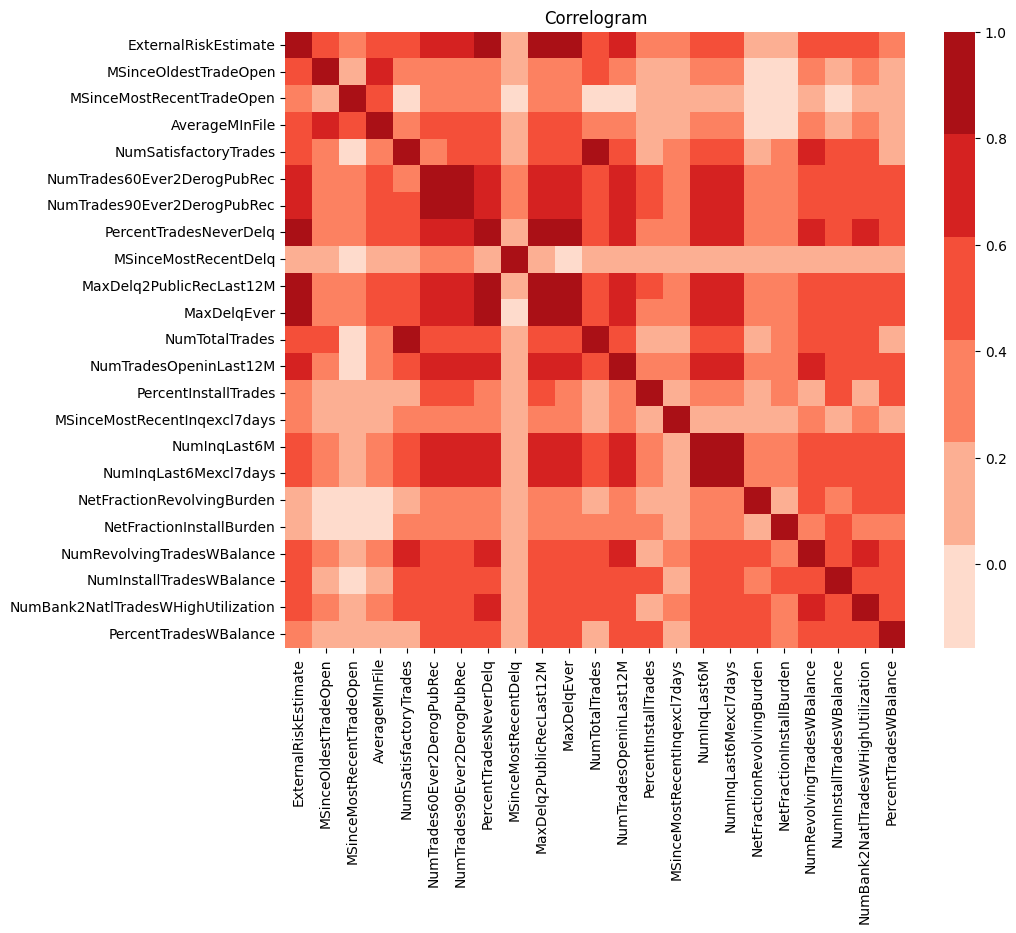

In [8]:
plot_correlogram(df)

We see some interesting correlation between Delinquency, both max and last 12 month, and External Risk Estimate. 


array([[<AxesSubplot: title={'center': 'ExternalRiskEstimate'}>,
        <AxesSubplot: title={'center': 'MSinceOldestTradeOpen'}>,
        <AxesSubplot: title={'center': 'MSinceMostRecentTradeOpen'}>,
        <AxesSubplot: title={'center': 'AverageMInFile'}>,
        <AxesSubplot: title={'center': 'NumSatisfactoryTrades'}>],
       [<AxesSubplot: title={'center': 'NumTrades60Ever2DerogPubRec'}>,
        <AxesSubplot: title={'center': 'NumTrades90Ever2DerogPubRec'}>,
        <AxesSubplot: title={'center': 'PercentTradesNeverDelq'}>,
        <AxesSubplot: title={'center': 'MSinceMostRecentDelq'}>,
        <AxesSubplot: title={'center': 'MaxDelq2PublicRecLast12M'}>],
       [<AxesSubplot: title={'center': 'MaxDelqEver'}>,
        <AxesSubplot: title={'center': 'NumTotalTrades'}>,
        <AxesSubplot: title={'center': 'NumTradesOpeninLast12M'}>,
        <AxesSubplot: title={'center': 'PercentInstallTrades'}>,
        <AxesSubplot: title={'center': 'MSinceMostRecentInqexcl7days'}>],
      

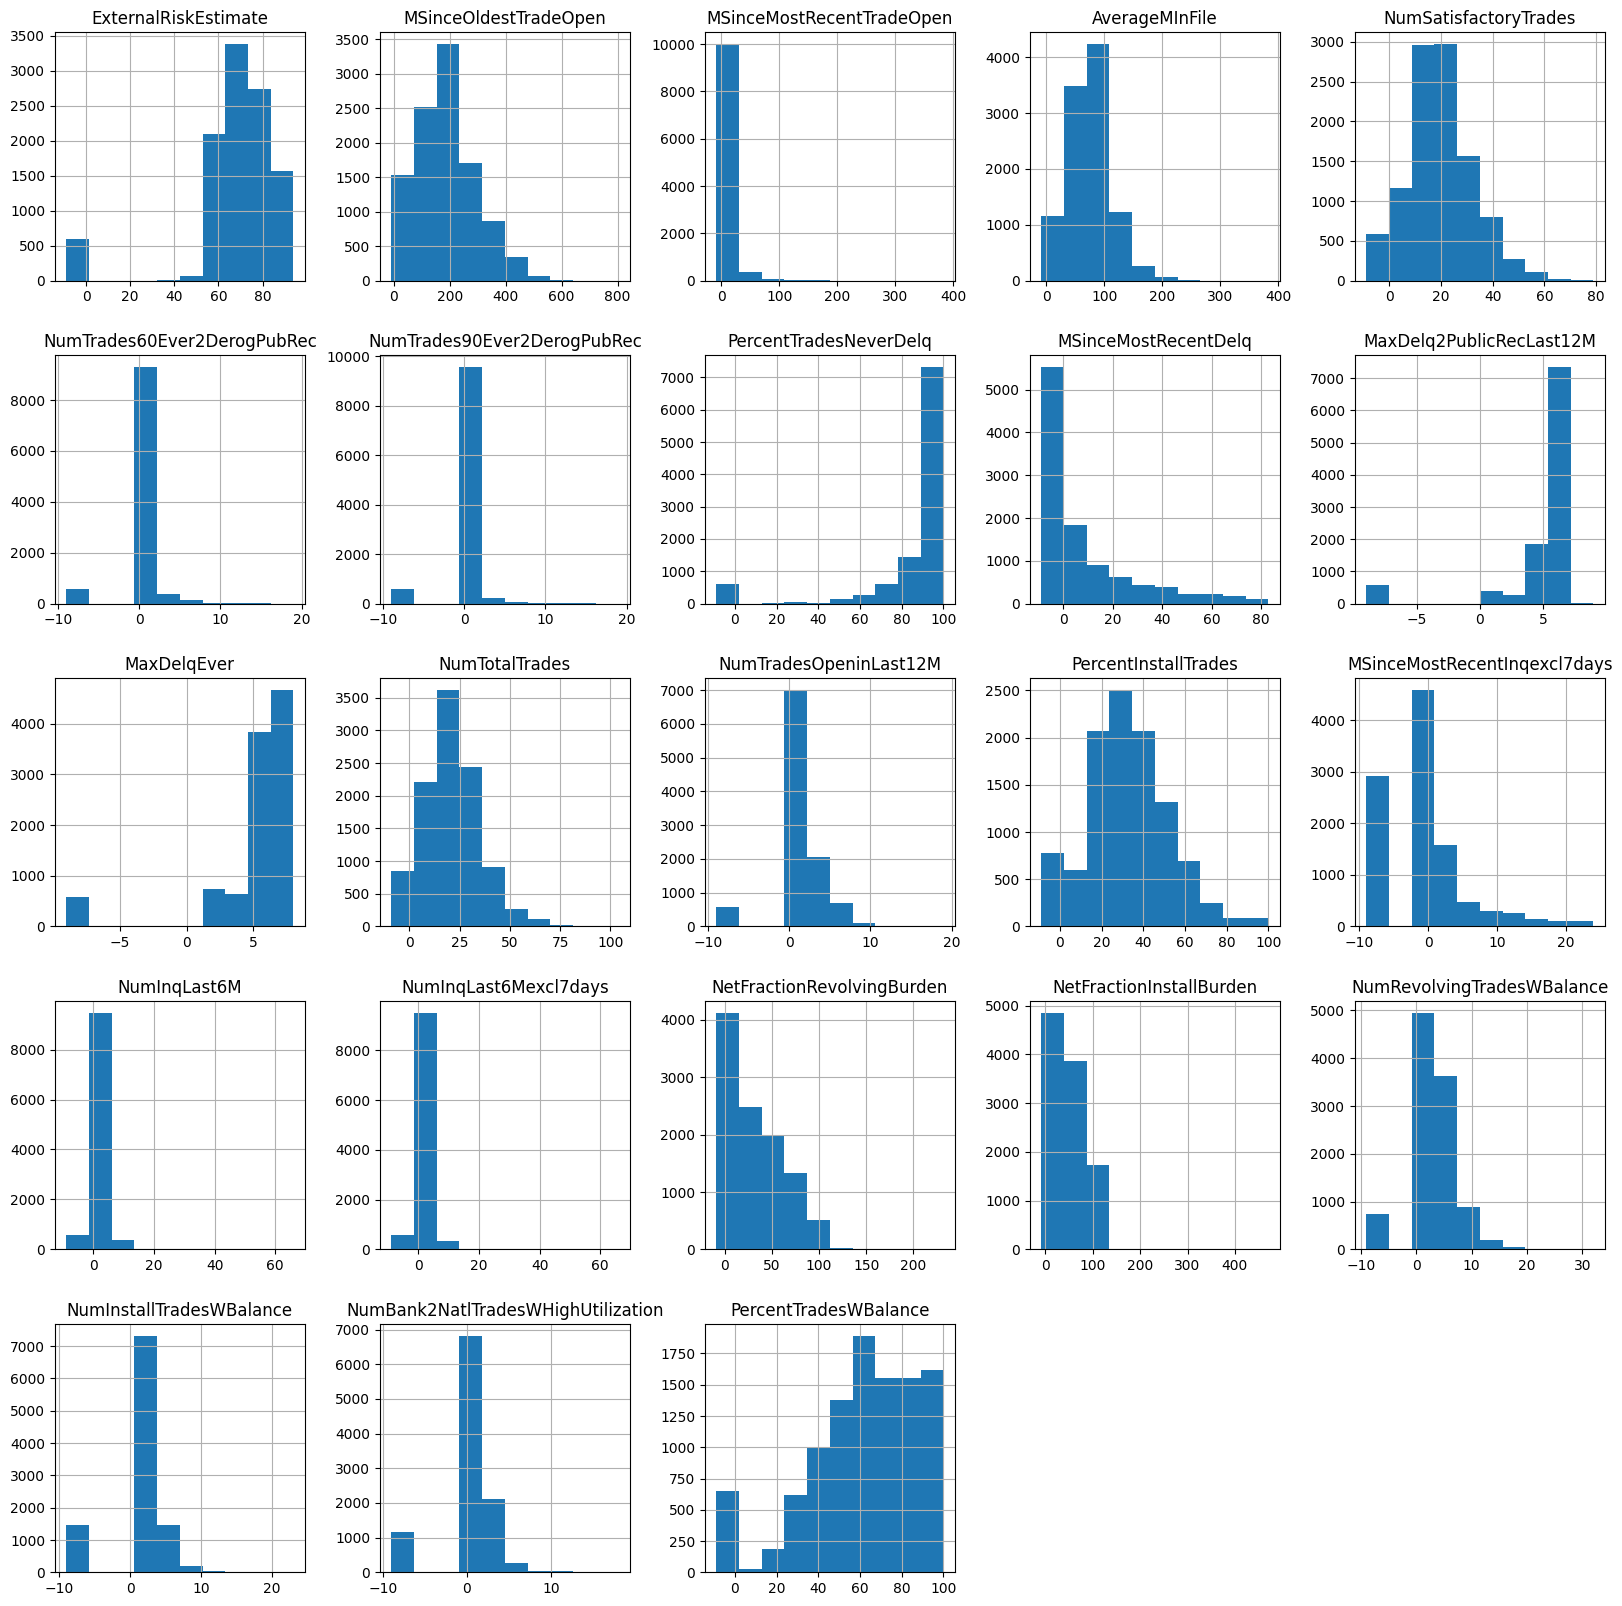

In [9]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(20,20))

    Preprocessing

Encoding the target variable to numerical values

In [10]:
# Label Encoder for 'RiskPerformance'
label = LabelEncoder()
df['RiskPerformance'] = label.fit_transform(df['RiskPerformance'])

Detecting outliers

In [11]:
#Detecting outliers
def detect_outliers(df):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25,10))
    fig.suptitle('Boxplots of all columns', fontsize=20)

    outliers = set()
    for i, col in enumerate(df.columns):
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = set(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
        outliers = outliers.union(column_outliers)
        
        # Plot boxplot in corresponding subplot
        ax = axes[i // 6][i % 6]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.scatter(list(column_outliers), df[col][list(column_outliers)], color='r')
    return outliers



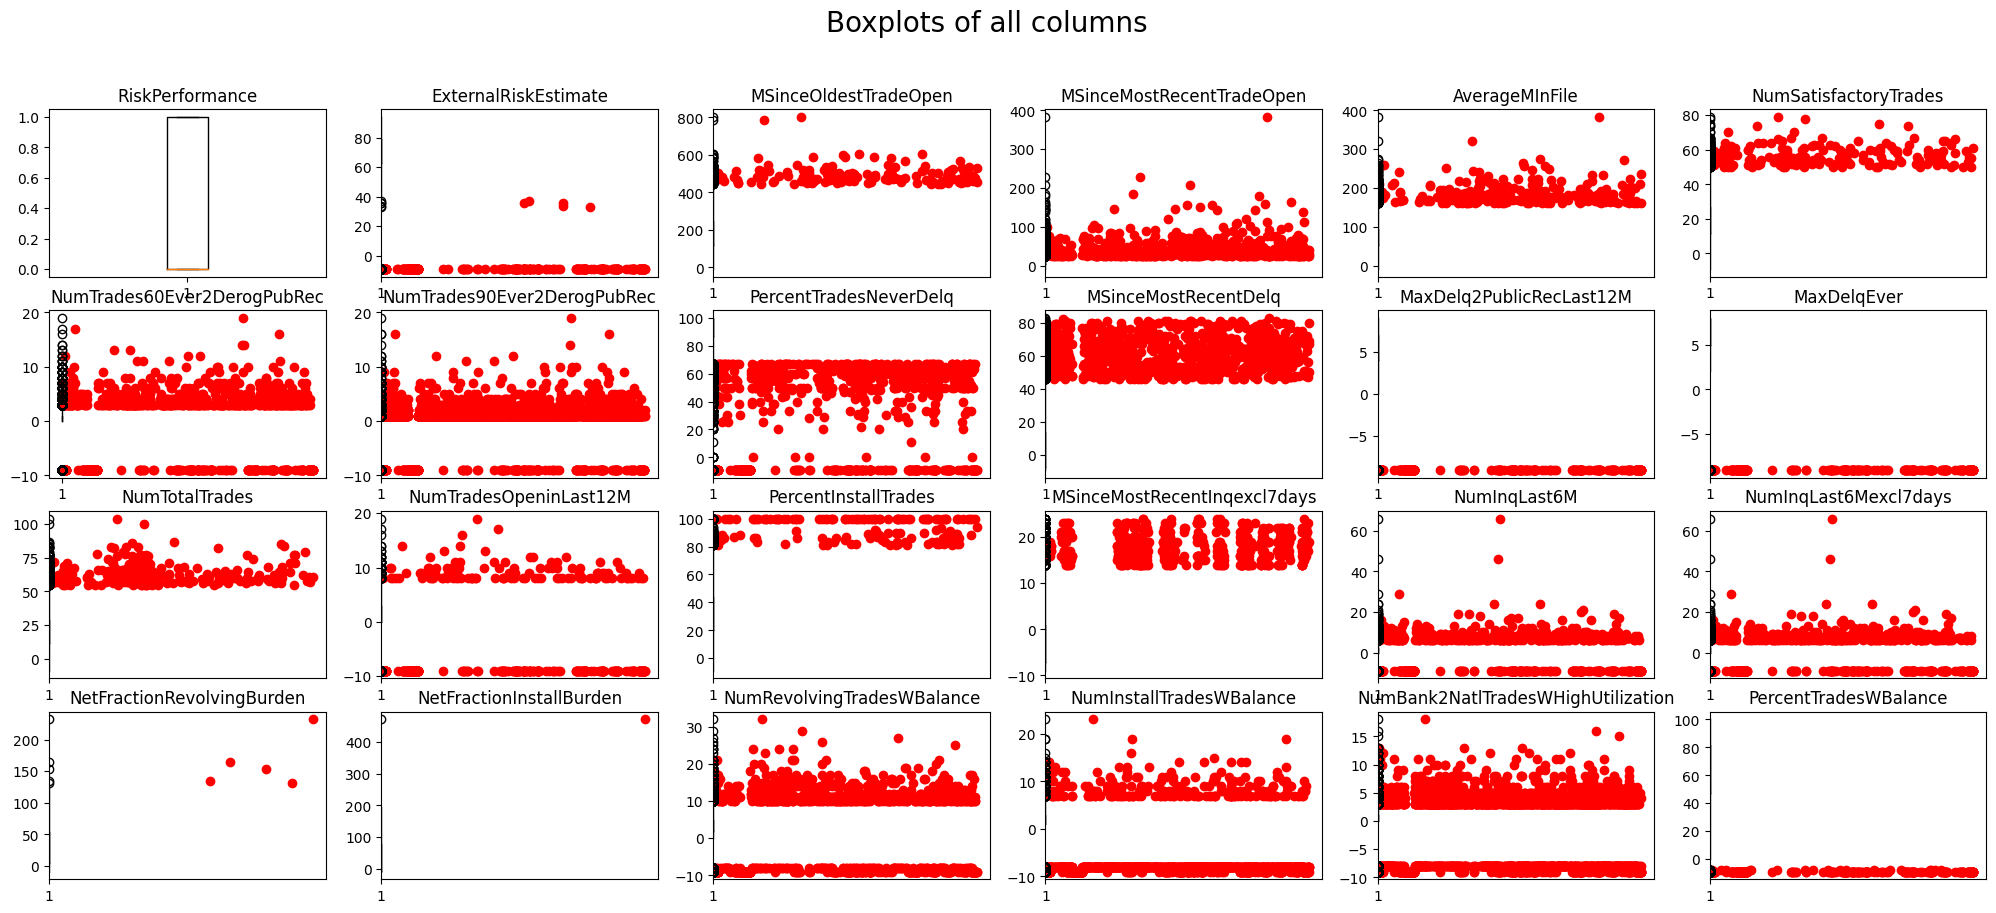

In [12]:
# Only works after label encoder
outliers = detect_outliers(df)
plt.show()

The red dots indicates wheter there are outliers for the given variable. It seems to be alot of outliers, but this is not the best indications. Due to the desribing minus values, as mentioned earlier, alot of outliers are detected for every column. But we do see that there are possibly some outliers for columns like: 
- `NetFractionRevolvingBurden`
- `NetFractionInstallBurden`
- `MSinceMostRecentTradeOpen` 
- `NumInqLast6M`

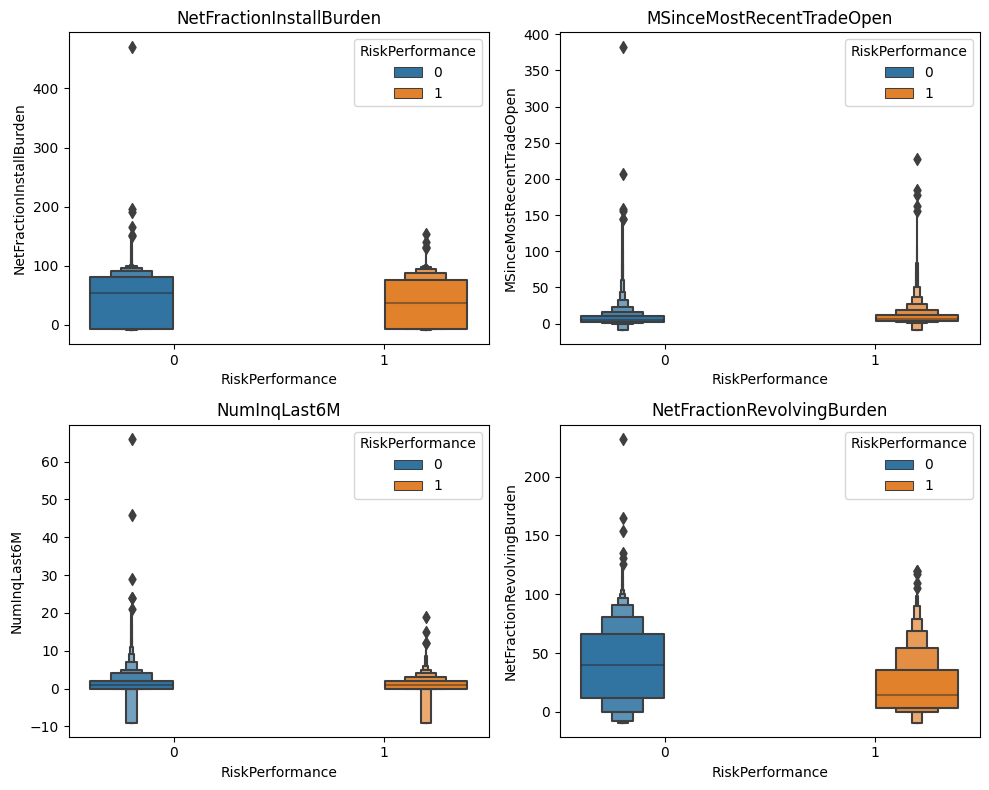

In [23]:
# Plotting the mentioned columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionInstallBurden', hue='RiskPerformance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('NetFractionInstallBurden')

# Plot the second boxplot
sns.boxenplot(x='RiskPerformance', y='MSinceMostRecentTradeOpen', hue='RiskPerformance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MSinceMostRecentTradeOpen')

# Plot the third boxplot
sns.boxenplot(x='RiskPerformance', y='NumInqLast6M', hue='RiskPerformance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('NumInqLast6M')

# Plot the fourth boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionRevolvingBurden', hue='RiskPerformance', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NetFractionRevolvingBurden')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# Replacing Outliers with Null values
for x in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumInqLast6M']: 
    Q3, Q1 = np.percentile(df.loc[:,x], [75,25])
    IQR = Q3 - Q1

    Max = Q3+(1.5*IQR)
    Min = Q1-(1.5*IQR)

    # Data points thats outside of min or max bound with a NULL value 
    df.loc[df[x] < Min,x] = np.nan
    df.loc[df[x] > Max,x] = np.nan

# Dropping the null values
df.dropna(axis = 0, inplace = True)

Removing outliers from these columns has given me the highest performing SVM classifier. Removing anymore has reduced the accuracy. 

In [25]:
# Extracting feature variables and target column
y = df.loc[:,'RiskPerformance']
X = df.drop(['RiskPerformance'], axis = 1)

# Scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# splitting the Data 
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=9)

    SVM Classifier 

In [27]:
#prints out the classification report and confusion matrix for the models
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\033[34m{model.__class__.__name__}\033[0m")
    print(f"    \033[32mClassification Report:\033[0m")
    for line in classification_report(y_test, y_pred).split('\n'):
        print(f"        {line}")
    print(f"    \033[32mConfusion Matrix:\033[0m")
    for line in str(confusion_matrix(y_test, y_pred)).split('\n'):
        print(f"        {line}")
    print()

In [28]:
# Fitting our SVM Classifier
svm = LinearSVC(max_iter=1000000, random_state=9)
svm.fit(XTrain, yTrain)

# Parameters for untuned model 
params = svm.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
class_weight,None
dual,True
fit_intercept,True
intercept_scaling,1
loss,squared_hinge
max_iter,1000000
multi_class,ovr
penalty,l2
random_state,9


In [29]:
# Priting out the results 
evaluate(svm, XTest, yTest)

LinearSVC
    Classification Report:
                      precision    recall  f1-score   support
        
                   0       0.75      0.75      0.75       906
                   1       0.73      0.72      0.73       839
        
            accuracy                           0.74      1745
           macro avg       0.74      0.74      0.74      1745
        weighted avg       0.74      0.74      0.74      1745
        
    Confusion Matrix:
        [[679 227]
         [231 608]]



SVM Accuracy Score: 73.75358166189112


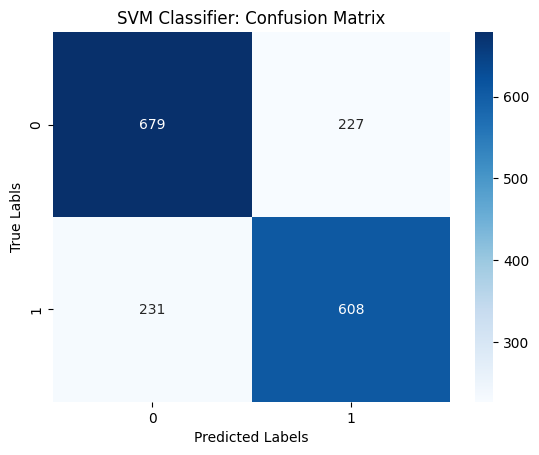

In [30]:
# Accuracy Score
yPred = svm.predict(XTest)
print('SVM Accuracy Score:', accuracy_score(yTest, yPred)*100)

# Visualizing the confusion Matrix 
cm = confusion_matrix(yTest, yPred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Classifier: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labls')
plt.show()

    Hyperparameter Tuning 

In [27]:
# Creating a dictionary for parameters
#grid_parameters = {'C': [0.1, 1, 10, 100 ], 'loss': ['hinge', 'squared_hinge']}
#TunedSVM = GridSearchCV(LinearSVC(max_iter=1000000), grid_parameters, cv=30, return_train_score=True, verbose = 2)
#print(TunedSVM.fit(XTrain, yTrain))

We get the following parameters from doing GRidSearchCV in ucloud:
- `loss`: hinge
- `C`: 1

In [31]:
# Best parameters 
#print(TunedSVM.best_params_)

#BestParams = TunedSVM.best_estimator_
svmTuned = LinearSVC(max_iter = 1000000, loss = 'hinge', C = 1, random_state = 9)

svmTuned.fit(XTrain, yTrain)



LinearSVC(C=1, loss='hinge', max_iter=1000000, random_state=9)

In [32]:
# Evaluating the model 
evaluate(svmTuned, XTest, yTest)


LinearSVC
    Classification Report:
                      precision    recall  f1-score   support
        
                   0       0.75      0.76      0.76       906
                   1       0.74      0.72      0.73       839
        
            accuracy                           0.74      1745
           macro avg       0.74      0.74      0.74      1745
        weighted avg       0.74      0.74      0.74      1745
        
    Confusion Matrix:
        [[690 216]
         [231 608]]



Tuned SVM Accuracy Score: 74.38395415472779


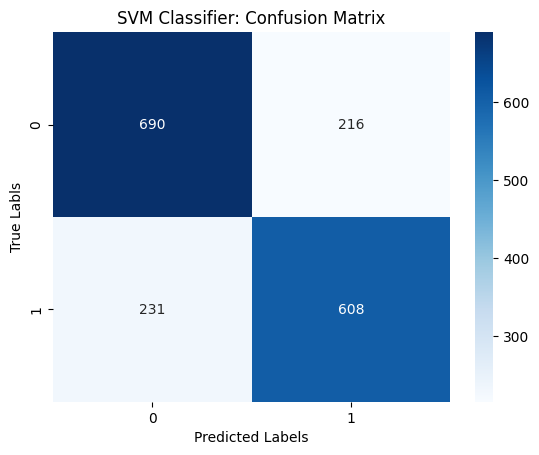

In [34]:
# Accuracy Score
yPredTuned = svmTuned.predict(XTest)
print('Tuned SVM Accuracy Score:', accuracy_score(yTest, yPredTuned)*100)

# Visualizing the confusion Matrix 
cm2 = confusion_matrix(yTest, yPredTuned)
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Classifier: Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labls')
plt.show()